In [1]:
import os,sys
import h5py
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from tqdm import tqdm
from PIL import Image

Using TensorFlow backend.


## Let's discover the different labels 

In [2]:
data_root='.'
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.label.nunique(),'labels')
label_counts=train.label.value_counts()
print(label_counts)

25 labels
candy          242
chocolate      199
juice          196
coffee         194
tea            184
cereal         181
water          170
jam            157
spices         135
honey          120
chips          118
soda           115
pasta          112
tomatosauce    111
nuts           109
cake           105
milk           105
vinegar        102
rice            97
oil             93
beans           88
sugar           77
flour           71
fish            71
corn            63
Name: label, dtype: int64


## Let's see the distribution of each class in the dataset

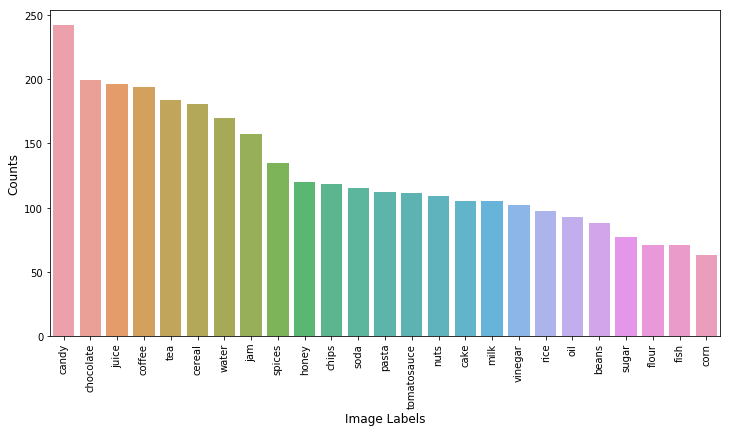

In [3]:
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

## Put each training image into a sub folder corresponding to its label after converting to JPG format

In [4]:
for img in tqdm(train.values):
    filename=img[0]
    label=img[1]
    src=os.path.join(data_root,'train_img',filename+'.png')
    label_dir=os.path.join(data_root,'train',label)
    dest=os.path.join(label_dir,filename+'.jpg')
    im=Image.open(src)
    rgb_im=im.convert('RGB')
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)
    rgb_im.save(dest)  
    if not os.path.exists(os.path.join(data_root,'train2',label)):
        os.makedirs(os.path.join(data_root,'train2',label))
    rgb_im.save(os.path.join(data_root,'train2',label,filename+'.jpg'))

100%|██████████| 3215/3215 [01:12<00:00, 44.37it/s]


## Some agile data augmentation (to prevent overfitting) + class balance

In [5]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

class_size=600

src_train_dir=os.path.join(data_root,'train')
dest_train_dir=os.path.join(data_root,'train2')
it=0
for count in label_counts.values:
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,label_counts.index[it])
    src_lab_dir=os.path.join(src_train_dir,label_counts.index[it])
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
            if i > ratio:
                break 
    it=it+1

242 484
199 597
196 588
194 582
184 552
181 543
170 510
157 471
135 540
120 600
118 590
115 575
112 560
111 555
109 545
105 525
105 525
102 510
97 582
93 558
88 528
77 539
71 568
71 568
63 567


## Let's check the new distribution

In [7]:
 for dirpath, dirnames, filenames in os.walk(dest_train_dir):
    i=0
    label=''
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        label=os.path.split(dirpath)[1]
        i+=1
    print(label,i)
        

 0
beans 599
cake 608
candy 714
cereal 710
chips 696
chocolate 775
coffee 755
corn 613
fish 628
flour 616
honey 705
jam 619
juice 767
milk 620
nuts 640
oil 636
pasta 657
rice 662
soda 675
spices 656
sugar 605
tea 721
tomatosauce 658
vinegar 602
water 667


In [ ]:
print ("===> Retraining with the new data: ")

cmd = 'python retrain.py --image_dir '+dest_train_dir
!{cmd}

===> Retraining with the new data: 
INFO:tensorflow:Looking for images in 'beans'
INFO:tensorflow:Looking for images in 'cake'
INFO:tensorflow:Looking for images in 'candy'
INFO:tensorflow:Looking for images in 'cereal'
INFO:tensorflow:Looking for images in 'chips'
INFO:tensorflow:Looking for images in 'chocolate'
INFO:tensorflow:Looking for images in 'coffee'
INFO:tensorflow:Looking for images in 'corn'
INFO:tensorflow:Looking for images in 'fish'
INFO:tensorflow:Looking for images in 'flour'
INFO:tensorflow:Looking for images in 'honey'
INFO:tensorflow:Looking for images in 'jam'
INFO:tensorflow:Looking for images in 'juice'
INFO:tensorflow:Looking for images in 'milk'
INFO:tensorflow:Looking for images in 'nuts'
INFO:tensorflow:Looking for images in 'oil'
INFO:tensorflow:Looking for images in 'pasta'
INFO:tensorflow:Looking for images in 'rice'
INFO:tensorflow:Looking for images in 'soda'
INFO:tensorflow:Looking for images in 'spices'
INFO:tensorflow:Looking for images in 'sugar'
IN

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9038.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9051.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9066.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9093.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9111.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9229.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9235.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9242.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9244.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9287.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9295.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6727.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6748.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6760.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6816.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6843.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6855.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6856.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6921.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6959.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6962.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6975.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4570.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4639.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4696.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4714.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_474.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4750.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4759.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4760.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4771.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_484.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4841.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2610.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2632.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2651.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2654.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2665.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2695.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2720.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2736.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2788.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2809.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2821.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_667d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_66b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_679b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_683d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_687a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_708b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_737d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_75b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_768b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_792b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_794d.

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_168d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_220b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_222c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_326d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_387b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_401b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_449b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_485a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_617d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_685a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_1391.j

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7739.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7756.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7776.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7797.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_783.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7845.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7866.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_787.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7907.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7911.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7945.jpg_inception_v3.txt
INFO:tensorflow:Creatin

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5646.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5660.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5669.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5674.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5699.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_572.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5771.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5779.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5790.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5791.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5799.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_748.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7482.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7570.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7575.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7593.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7619.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7638.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7655.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7670.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3457.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3470.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5509.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5517.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5527.jpg_inception_v3.txt
INFO:tensorflow:900 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_554.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5540.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_557.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1255.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1315.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1323.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_134.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1356

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3250.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3253.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3298.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_33.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3341.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3374.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3393.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_342.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_103d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_111b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_117b.jpg_inception_v3.txt
INFO:tensorflow

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_783a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_8b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_103.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1074.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_108.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1133.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1180.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1183.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_9854.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_9959.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7809.jpg_inception_v3.txt
INFO:tensorflow:Cre

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_6386.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_6634.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_716.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7684.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3769.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4152.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4350.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4400.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4626.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4671.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8740.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8756.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8779.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8781.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8799.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8805.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8806.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8817.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8818.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8819.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8822.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6028.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6034.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6053.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6110.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6183.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6194.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6220.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6273.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6278.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6304.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4068.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4095.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4106.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4136.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4141.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4178.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4179.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4227.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4236.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4263.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4278.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1510.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1511.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1530.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1539.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1540.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1590.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_161.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1611.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1618.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1637.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1750.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_578b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_582c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_583c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_588b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_594b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_595d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_599d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_60c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_611c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_612b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_613d

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_209b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_211c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_215d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_216a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_223a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_237d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_239b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_243d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_24b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_262a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_271c

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4005.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4061.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4129.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_424.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_45.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_7c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_804b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1101.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1172.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1431.jpg_inception_v3.txt
INFO:tens

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_2835.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_2854.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_3073.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_475c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_476d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_521d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_529a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_619a.jpg_inception_v3.txt
INFO:tensorflow:1900 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_621a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_634a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlen

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9214.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9329.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_933.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9347.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9385.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9411.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9426.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9439.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9442.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9449.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9465.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_725.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7266.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7268.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7312.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7333.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7354.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7355.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_738.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7400.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7419.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_50.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_504.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5083.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5103.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5110.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5124.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5149.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5165.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5184.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5199.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5222.jpg_inception_v3.txt
IN

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_302.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3060.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3061.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3069.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3077.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3079.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3124.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3136.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3143.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3192.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1182.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1186.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1195.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_122.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1255.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1278.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1293.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1301.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1328.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1345.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_136.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_431a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_433d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_437c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_437d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_439c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_443c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_446c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_450d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_452b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_467d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cerea

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_750a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_76a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_775b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_775c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_800a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_8d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1383.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1466.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1578.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1641.jpg_i